## Stock Price Prediction

### import libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#### data collection

In [2]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    return html[0]

In [3]:
df = load_data()
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [5]:
unique_sector = df['GICS Sector'].unique()
unique_sector

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [6]:
len(unique_sector)

11

In [7]:
sector = df.groupby('GICS Sector')
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group Inc,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,Apache Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,AFLAC Inc,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M Company,reports,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture plc,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals Inc,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  26.0  1.115660e+06  524383.320718  18926.0  752994.75   
Consumer Discretionary  61.0  8.143569e+05  478072.250041  27419.0  354950.00   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  25.0  8.090254e+05  625403.821075   4447.0   93410.00   
Financials              65.0  6.313738e+05  542517.054005   4962.0   64040.00   
Health Care             63.0  7.855973e+05  519952.192813   1800.0  310461.00   
Industrials             73.0  6.572375e+05  588194.922365   4281.0   76334.00   
Information Technology  73.0  9.024073e+05  520218.258034   2488.0  723531.00   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             31.0  9.012814e+05  317841.910231  34903.0  831190.50   
Utilities               28.0  8.035041e+05  431315.460314   4904.0  727840.75   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1532807.75  1754301.0  
Consumer Discretionary   908255.0  1121788.00  1585689.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                  1021860.0  1358071.00  1701605.0  
Financials               720005.0  1120193.00  1601712.0  
Health Care              875320.0  1092214.50  1792044.0  
Industrials              728535.0  1060391.00  1783180.0  
Information Technology   883241.0  1336920.00  1786842.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              922864.0  1052488.50  1393311.0  
Utilities                850906.5  1036121.50  1711269.0

In [9]:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Biotechnology,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
472,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
487,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [11]:
#list of S&P 500 symbol
list(df.Symbol)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO

#### Retrieve the stock data

In [12]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = list(df.Symbol),

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [13]:
data.head()

MNST                                                   URI  \
                 Open       High        Low      Close   Volume        Open   
Date                                                                          
2020-01-02  63.959999  64.019997  63.310001  63.700001  1783000  168.410004   
2020-01-03  63.119999  63.610001  62.869999  63.279999  1741100  164.990005   
2020-01-06  62.990002  63.529999  62.990002  63.380001  2234600  162.610001   
2020-01-07  63.869999  64.139999  63.540001  63.689999  3367800  165.000000   
2020-01-08  63.700001  64.059998  63.369999  63.820000  3026800  165.309998   

                                                         ...         DOV  \
                  High         Low       Close   Volume  ...        Open   
Date                                                     ...               
2020-01-02  168.669998  164.410004  168.649994   861200  ...  114.531388   
2020-01-03  166.559998  161.369995  165.710007  1089000  ...  113.515743   
2020-01-06  165.690002  162.360001  165.380005   707500  ...  113.101600   
2020-01-07  165.970001  163.630005  165.080002   525200  ...  113.328387   
2020-01-08  166.270004  163.610001  164.809998   688700  ...  114.304590   

                                                               CCI  \
                  High         Low       Close  Volume        Open   
Date                                                                 
2020-01-02  115.241356  113.998913  115.241356  937500  139.185238   
2020-01-03  114.304590  113.032566  114.166542  587400  137.737920   
2020-01-06  114.235576  112.914253  114.176414  754200  138.999416   
2020-01-07  114.797621  112.983266  114.491943  810700  137.884609   
2020-01-08  114.965251  113.712953  114.758179  848400  135.938585   

                                                         
                  High         Low       Close   Volume  
Date                                                     
2020-01-02  139.507949  138.011755  138.549591  1795500  
2020-01-03  139.547035  137.004491  139.312347  1254500  
2020-01-06  139.527478  138.129081  138.138855  1631100  
2020-01-07  138.295327  135.107362  135.801666  1667200  
2020-01-08  136.818709  135.527867  136.368866  2644600  

[5 rows x 2527 columns]

#### data for specific company

In [18]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200
...,...,...,...,...,...
2020-11-19,117.589996,119.059998,116.809998,118.639999,74113000
2020-11-20,118.639999,118.769997,117.290001,117.339996,73391400
2020-11-23,117.180000,117.620003,113.750000,113.849998,127959300


#### plot closing price for any company

In [32]:
def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
    plt.plot(df.Date, df.Close, color='red', alpha=0.2)
    plt.xticks(rotation=90)
    plt.title(symbol)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

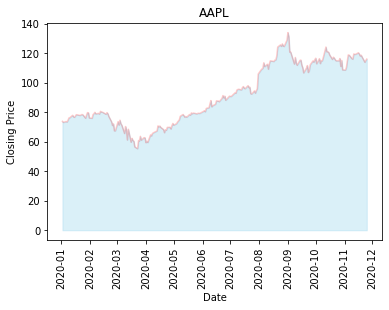

In [33]:
#plot closing price for AAPL 
price_plot('AAPL')

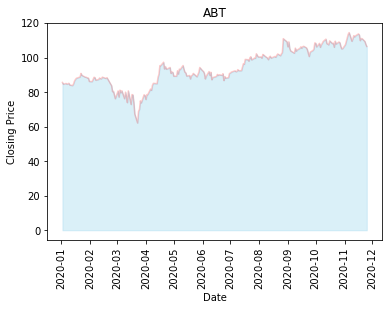

In [34]:
price_plot('ABT')

In [36]:
data.to_csv('S&P_500.csv', index=False)